# Importar os dados

In [ ]:
import pandas as pd

ds_test = pd.read_csv(r"C:\Users\filip\Desktop\Mestrado\2semestre\TMCD\Trabalho\Dataset\amazon_reviews_test.csv")
ds_train = pd.read_csv(r"C:\Users\filip\Desktop\Mestrado\2semestre\TMCD\Trabalho\Dataset\amazon_reviews_train.csv")

print(ds_train.count())
print(ds_test.count())

sentiment    48902
review       48902
dtype: int64
sentiment    2417
review       2417
dtype: int64


# MODELOS PRÉ-TREINADOS com Transformers

### distilbert-base-uncased-finetuned-sst-2-english

Device set to use cpu


Acurácia: 0.8237484484898635

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.65      0.90      0.76       741
    positive       0.95      0.79      0.86      1676

    accuracy                           0.82      2417
   macro avg       0.80      0.85      0.81      2417
weighted avg       0.86      0.82      0.83      2417


Matriz de Confusão:
 [[ 667   74]
 [ 352 1324]]


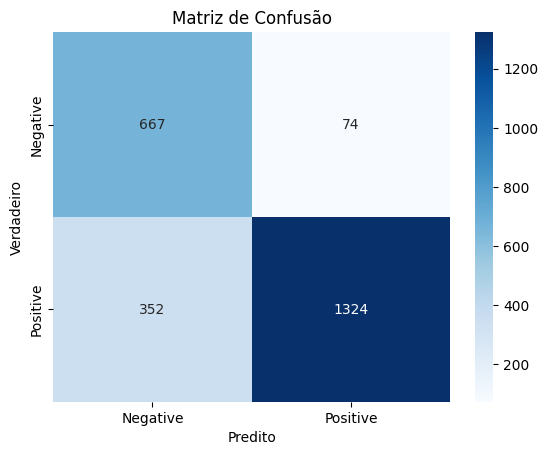

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt

reviews = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()  # valores 'positive' ou 'negative'

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

results = classifier(reviews, batch_size=16)

pred_labels = [r["label"].lower() for r in results]  # converte para minúsculas para bater com os verdadeiros

print("Acurácia:", accuracy_score(true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


### siebert/sentiment-roberta-large-english

c:\Users\filip\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\filip\.cache\huggingface\hub\models--siebert--sentiment-roberta-large-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


Acurácia: 0.9300786098469177

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.84      0.95      0.89       741
    positive       0.98      0.92      0.95      1676

    accuracy                           0.93      2417
   macro avg       0.91      0.94      0.92      2417
weighted avg       0.94      0.93      0.93      2417


Matriz de Confusão:
 [[ 704   37]
 [ 132 1544]]


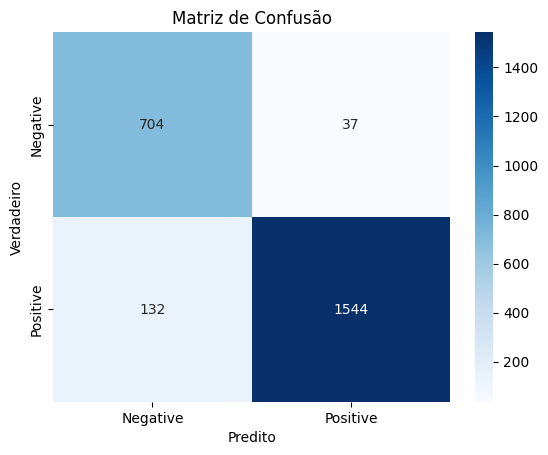

In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

reviews = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

classifier = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

results = classifier(reviews, batch_size=16)

pred_labels = [r["label"].lower() for r in results]

print("Acurácia:", accuracy_score(true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


### nlptown/bert-base-multilingual-uncased-sentiment (positive >=4)

Device set to use cpu


Acurácia: 0.877120397186595

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.73      0.96      0.83       741
    positive       0.98      0.84      0.90      1676

    accuracy                           0.88      2417
   macro avg       0.85      0.90      0.87      2417
weighted avg       0.90      0.88      0.88      2417


Matriz de Confusão:
 [[ 712   29]
 [ 268 1408]]


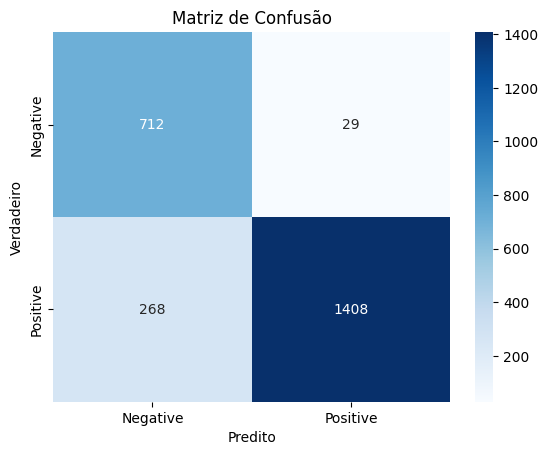

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

reviews = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", tokenizer="nlptown/bert-base-multilingual-uncased-sentiment", truncation=True, max_length=512)

results = classifier(reviews, batch_size=16, truncation=True, max_length=512)
stars = [int(res["label"][0]) for res in results]

def force_binary(star):
    return "positive" if star >= 4 else "negative"

pred_labels = [force_binary(star) for star in stars]

print("Acurácia:", accuracy_score(true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


### nlptown/bert-base-multilingual-uncased-sentiment (positive >= 3)

Device set to use cpu


Acurácia: 0.9085643359536616

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85       741
    positive       0.93      0.94      0.93      1676

    accuracy                           0.91      2417
   macro avg       0.89      0.89      0.89      2417
weighted avg       0.91      0.91      0.91      2417


Matriz de Confusão:
 [[ 621  120]
 [ 101 1575]]


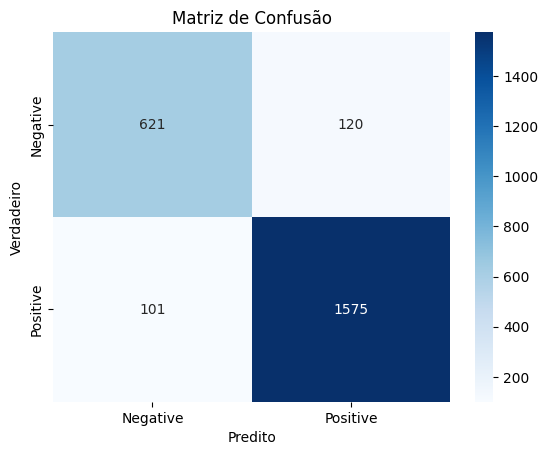

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

reviews = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", tokenizer="nlptown/bert-base-multilingual-uncased-sentiment", truncation=True, max_length=512)

results = classifier(reviews, batch_size=16, truncation=True, max_length=512)
stars = [int(res["label"][0]) for res in results]

def force_binary(star):
    return "positive" if star >= 3 else "negative"

pred_labels = [force_binary(star) for star in stars]

print("Acurácia:", accuracy_score(true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

### cardiffnlp/twitter-roberta-base-sentiment (neutro = negativo)

Device set to use cpu


Número de observações usadas (ignorando neutros): 2417
Acurácia: 0.8911874224244932

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.79      0.88      0.83       741
    positive       0.94      0.90      0.92      1676

    accuracy                           0.89      2417
   macro avg       0.87      0.89      0.88      2417
weighted avg       0.90      0.89      0.89      2417


Matriz de Confusão:
 [[ 653   88]
 [ 175 1501]]


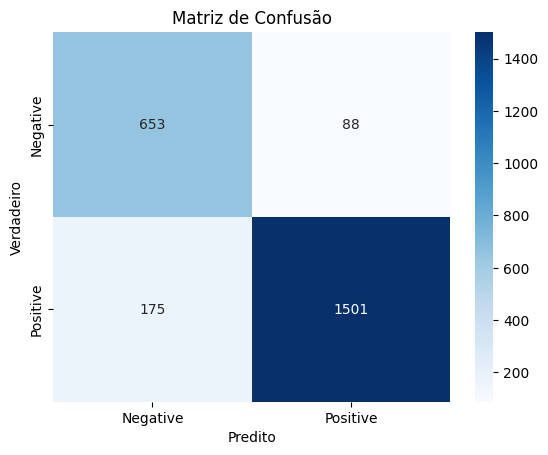

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

texts = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

results = classifier(texts, batch_size=16)

label_map = {
    "LABEL_0": "negative",
    "LABEL_1": "negative",
    "LABEL_2": "positive"
}

pred_labels = []
filtered_true_labels = []

for r, true in zip(results, true_labels):
    if r["label"] in label_map:
        pred_labels.append(label_map[r["label"]])
        filtered_true_labels.append(true)

print(f"Número de observações usadas (ignorando neutros): {len(pred_labels)}")
print("Acurácia:", accuracy_score(filtered_true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(filtered_true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(filtered_true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

### cardiffnlp/twitter-roberta-base-sentiment (neutro = positivo)

Device set to use cpu


Número de observações usadas (ignorando neutros): 2417
Acurácia: 0.877120397186595

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.85      0.73      0.78       741
    positive       0.89      0.94      0.91      1676

    accuracy                           0.88      2417
   macro avg       0.87      0.84      0.85      2417
weighted avg       0.88      0.88      0.87      2417


Matriz de Confusão:
 [[ 539  202]
 [  95 1581]]


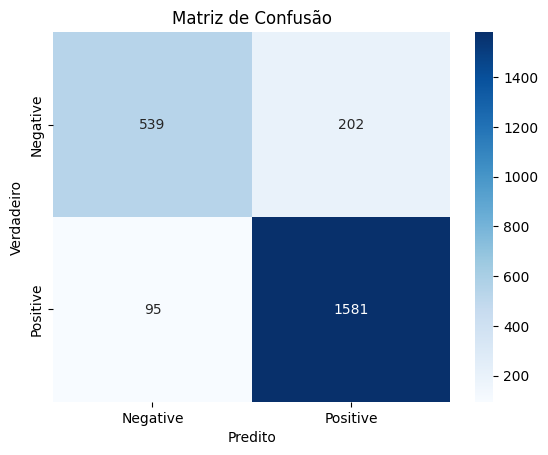

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

texts = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

results = classifier(texts, batch_size=16)

label_map = {
    "LABEL_0": "negative",
    "LABEL_1": "positive",
    "LABEL_2": "positive"
}

pred_labels = []
filtered_true_labels = []

for r, true in zip(results, true_labels):
    if r["label"] in label_map:
        pred_labels.append(label_map[r["label"]])
        filtered_true_labels.append(true)

print(f"Número de observações usadas (ignorando neutros): {len(pred_labels)}")
print("Acurácia:", accuracy_score(filtered_true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(filtered_true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(filtered_true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

### bhadresh-savani/bert-base-uncased-emotion

c:\Users\filip\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\filip\.cache\huggingface\hub\models--bhadresh-savani--bert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not in

Acurácia: 0.7716177079023583

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.66      0.54      0.59       741
    positive       0.81      0.88      0.84      1676

    accuracy                           0.77      2417
   macro avg       0.73      0.71      0.72      2417
weighted avg       0.76      0.77      0.76      2417


Matriz de Confusão:
 [[ 398  343]
 [ 209 1467]]


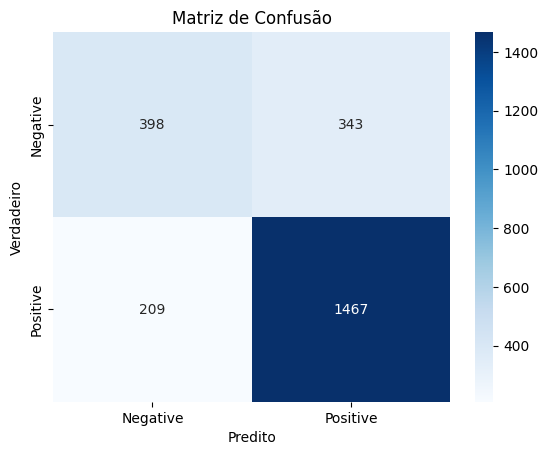

In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

reviews = ds_test["review"].tolist()
true_labels = ds_test["sentiment"].tolist()

classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion", return_all_scores=False)

emotion_to_sentiment = {
    "joy": "positive",
    "love": "positive",
    "surprise": "positive",
    "anger": "negative",
    "fear": "negative",
    "sadness": "negative"
}

pred_labels = []

for result in classifier(reviews, batch_size=16):
    emotion = result["label"]
    sentiment = emotion_to_sentiment.get(emotion, "neutral")  # fallback só por segurança
    pred_labels.append(sentiment)

print("Acurácia:", accuracy_score(true_labels, pred_labels))
print("\nRelatório de Classificação:\n", classification_report(true_labels, pred_labels))
print("\nMatriz de Confusão:\n", confusion_matrix(true_labels, pred_labels))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()
